In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from tqdm.auto import tqdm
import pandas as pd
os.chdir("..")

In [2]:
from car_tracking.frame_generator import FrameGen
from car_tracking.background_subtractor import BackgroundSubstraction
from car_tracking.car_extractor import CarExtractor
from car_tracking.car_extractor import ExtractionReport
from car_tracking.tracker import Tracker

In [3]:
video_path = 'data/highway.mp4'
sample_rate = 2 

In [4]:
gen = FrameGen(video_path, sample_rate)

In [5]:
bs = BackgroundSubstraction(batch_size=200, inner_sample_rate = 2)
bs.fit(gen)

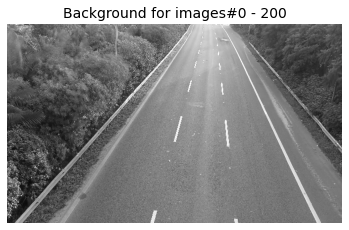

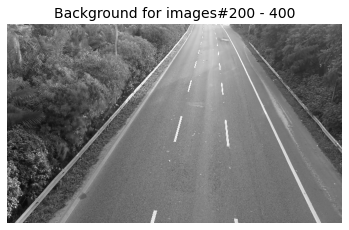

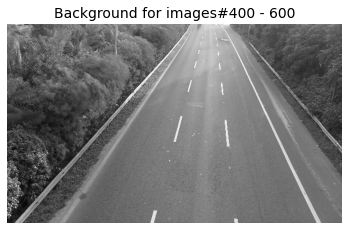

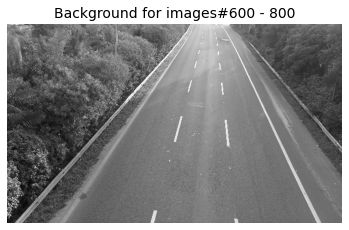

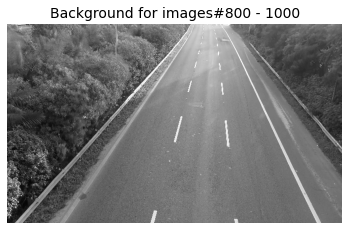

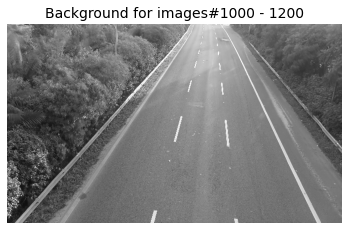

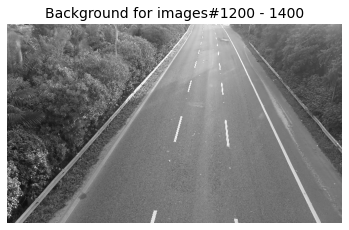

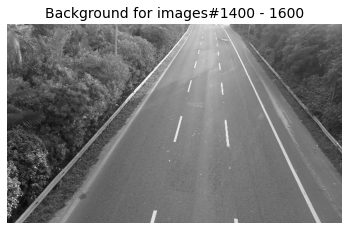

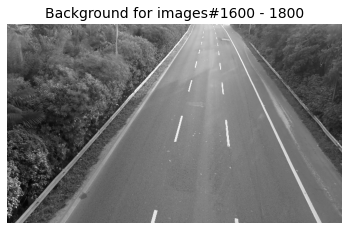

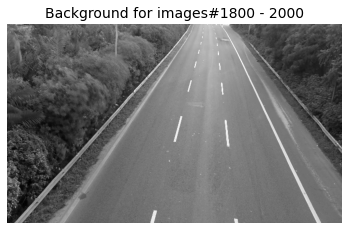

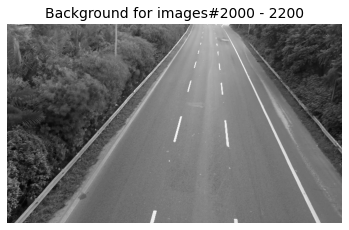

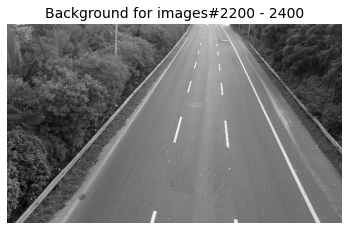

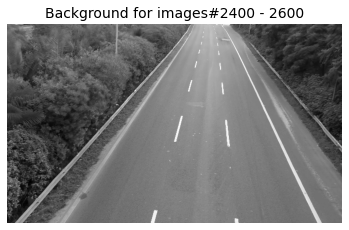

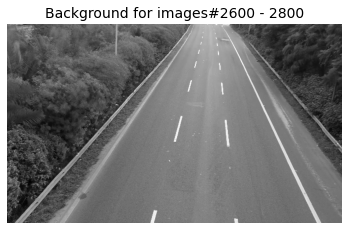

In [6]:
bs.visualize()

In [ ]:
car_extract = CarExtractor(bs, 3, 13, 500)
selected_bboxes, selected_sources  = car_extract.run(gen)

In [ ]:
extraction_report = ExtractionReport(gen, selected_bboxes, selected_sources)
extraction_report.report

In [ ]:
extraction_report.save_crops('outputs/saved_crops/')

In [ ]:
tracker = Tracker(extraction_report, 0.05)
tracker.run(gen)

In [ ]:
tracker.tracking_df

In [ ]:
tracker.save_by_trackid(gen, 'outputs/tracks/')